In [2]:
# 주요 라이브러리를 import
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [3]:
def get_images(directory):
    Images = []
    Labels = [] 
    label = 0

    for labels in os.listdir(directory):
        if labels == 'apple_pie':
            label = 0
        elif labels == 'baby_back_ribs':
            label = 1
        elif labels == 'baklava':
            label = 2
        elif labels == 'beef_carpaccio':
            label = 3
        elif labels == 'beef_tartare':
            label = 4
        elif labels == 'beet_salad':
            label = 5
    
        for image_file in os.listdir(directory+labels): 
            image = cv2.imread(directory+labels+r'/'+image_file)
            image = cv2.resize(image,(150,150)) 
            Images.append(image)
            Labels.append(label)

    return shuffle(Images,Labels,random_state=817328462)

def get_classlabel(class_code):
    labels = {0:'apple_pie', 1:'baby_back_ribs', 2:'baklava', 3:'beef_carpaccio', 4:'beef_tartare', 5:'beet_salad', }
    return labels[class_code]


In [4]:
Images, Labels = get_images('../data/ic/images/') #

Images = np.array(Images) 
Labels = np.array(Labels)

In [5]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (600, 150, 150, 3)
Shape of Labels: (600,)


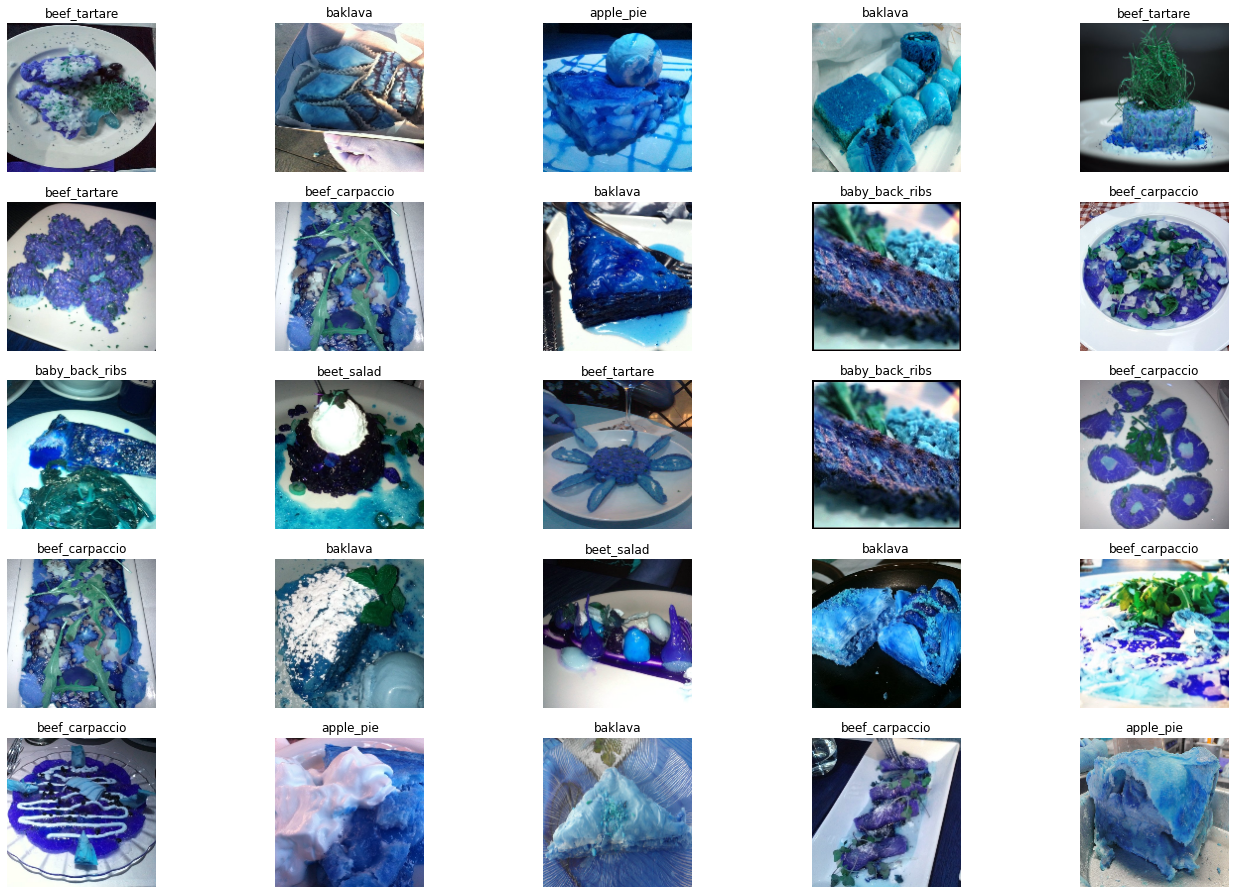

In [6]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 50)        4

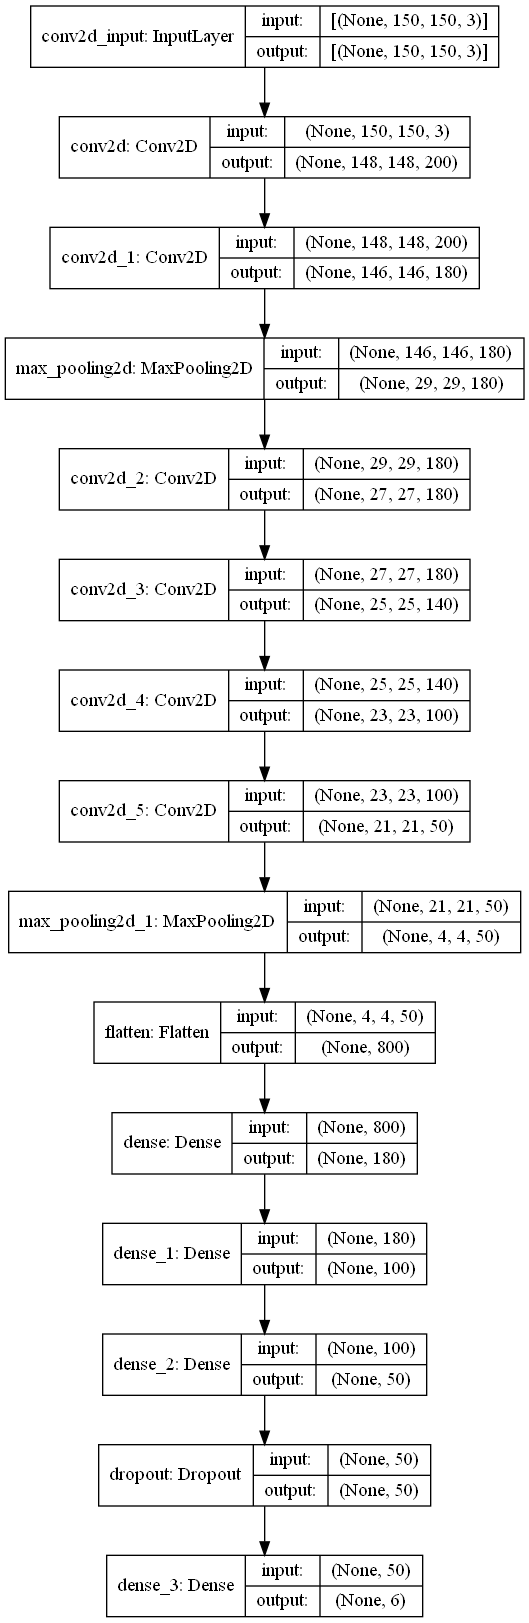

In [7]:
model = Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model,to_file='model.png',show_shapes=True)

In [8]:
trained = model.fit(Images,Labels,epochs=1,validation_split=0.20)

15/15 [==============================] - 438s 29s/step - loss: 5.0056 - accuracy: 0.1376 - val_loss: 1.8492 - val_accuracy: 0.1750
